In [12]:
!pip install kneed

In [2]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
# Import the data
dataset= pd.read_csv('/Users/sahasrabalaji/Desktop/SAHASRA/Elevate Labs/Aug 15 2025/Mall_Customers.csv')

In [4]:
# Understand the data
print(dataset.shape)

(200, 5)


In [5]:
print(dataset.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
# Selecting features for clustering
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

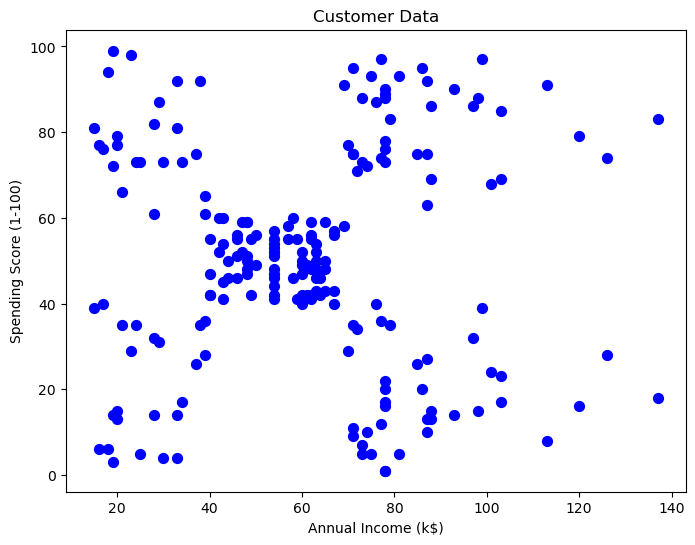

In [10]:
# Visualize data
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data')
plt.show()

In [13]:
from kneed import KneeLocator

kneedle = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
print(f"The optimal number of clusters is: {optimal_k}")

The optimal number of clusters is: 5


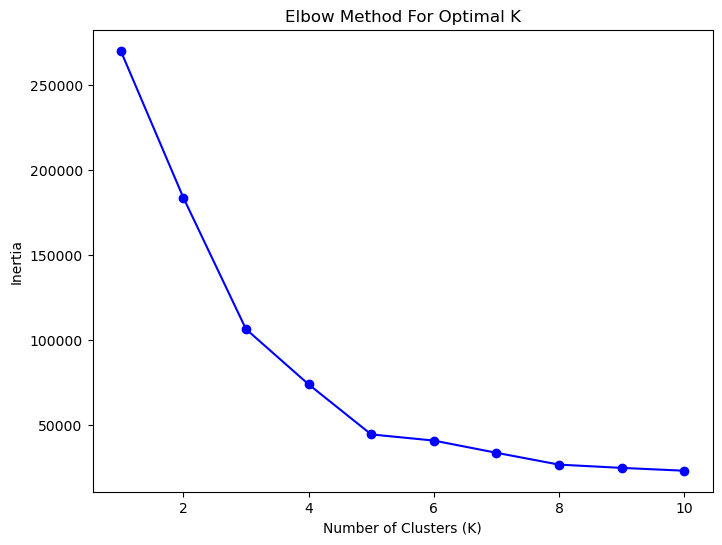

In [11]:
# Elbow Method to Find Optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [14]:
# Fit KMeans with optimal K
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dataset['Cluster'] = cluster_labels

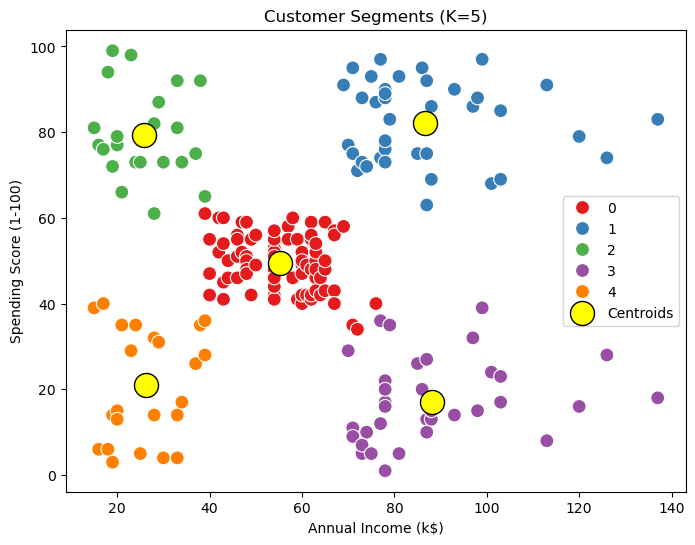

In [15]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set1', s=100)

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, label='Centroids', edgecolor='black')

plt.title('Customer Segments (K=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
# Evaluate with Silhouette Score
score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.55
